Total points for this HW: 100.

Please note: **Copying and pasting other people's work is absolutely prohibited**. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.


<span style='color:red'>  pts</span>

In [2]:
from IPython.display import Image
import pandas as pd
import numpy as np

### Q1 KNN (35 points)   <span style='color:red'>  pts</span>

Given a dataset with 53,414 points in "HW3Q1.txt" which is KEGG Metabolic Relation Network (Directed) Data Set
https://archive.ics.uci.edu/ml/datasets/KEGG+Metabolic+Relation+Network+%28Directed%29, you should ignore the first column which is not real value and focus on columns 2 to 24.

a) implement the function of Euclidean distance, test it on the first two points in the given dataset, and output the distance. (10 points)

Attribute Information:

a) Pathway text   
b) Nodes integer (min:2, max:116)   
c) Edges integer (min:1, max:606)   
d) Connected Components integer (min:1, max:13)     
e) Network Diameter integer (min:1, max:30)   
f) Network Radius integer (min:1, max:2)    
g) Shortest Path integer (min:1, max:3277)    
h) Characteristic Path Length real (min:1, [Web Link])    
i) Avg.num.Neighbours real (min:1, [Web Link])    
j) Isolated Nodes integer (min:0, max:1)     
k) Number of Self Loops integer (min:0, max:0)    
l) Multi-edge Node Pair integer (min:0, max:57)     
m) NeighborhoodConnectivity real (min:1, [Web Link])    
n) Outdegree real (min:0.5, [Web Link])     
o) Stress real (min:0, [Web Link])      
p) SelfLoops integer (min:0, max:0)     
q) PartnerOfMultiEdgedNodePairs real (min:0, [Web Link])    
r) EdgeCount real (min:1, [Web Link])      
s) BetweennessCentrality real (min:0, [Web Link])     
t) Indegree real (min:0.5, [Web Link])        
u) Eccentricity real ([Web Link], [Web Link])     
v) ClosenessCentrality real ([Web Link], max:1)     
w) AverageShortestPathLength real ([Web Link], [Web Link])     
x) ClusteringCoefficient real (min:0, [Web Link])     

In [70]:
# your answers here
q1=pd.read_csv('HW3Q1.txt', header=None)
q1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,aac00010,26,43,2,7,1,211,3.222749,3.230769,0,0,1,4.125758,1.653846,27.000000,0,0.076923,3.307692,0.062418,1.653846,3.923077,0.375199,2.210114,0.221154
1,aac00020,27,52,2,10,1,226,3.411504,3.851852,0,0,0,4.516696,1.925926,26.629630,0,0.000000,3.851852,0.036567,1.925926,4.074074,0.399880,2.168687,0.290197
2,aac00030,26,53,2,6,1,202,2.732673,3.769231,0,0,3,4.286493,2.038462,14.961538,0,0.230769,4.076923,0.026604,2.038462,3.115385,0.430368,1.864288,0.230311
3,aac00040,20,28,1,8,1,65,2.523077,2.600000,0,0,1,2.936667,1.400000,4.950000,0,0.100000,2.800000,0.014474,1.400000,2.450000,0.481044,1.492500,0.210000
4,aac00051,15,33,1,4,2,85,1.858824,4.400000,0,0,0,5.284206,2.200000,5.000000,0,0.000000,4.400000,0.026740,2.200000,2.333333,0.518691,1.532326,0.267222


In [71]:
def euc_distance(a,b,df):
    diff = 0
    for i in range(1,df.shape[1]):
        x=a[i].reset_index(drop=True)
        y=b[i].reset_index(drop=True)
        diff += np.square(x-y)
    return np.sqrt(diff).to_numpy()[0]

In [72]:
euc_distance(q1.iloc[:1],q1.iloc[1:2],q1)

17.837937709396144

b) given the first point as query, implement the baseline (slide 10 of lecture 8) which scans every point in the rest of the file, return the nearest neighbor to the query. In the end, output the resulted point and the distance to the query. (10 points)

In [73]:
# your answers here
import time
start_time = time.time()
distances=[]
for i in range(1,q1.shape[0]):
    distances.append(euc_distance(q1.iloc[:1],q1.iloc[i:i+1],q1))
print("--- %s seconds ---" % (time.time() - start_time))

--- 960.3393502235413 seconds ---


In [ ]:
len(distances)

53412

In [ ]:
np.min(distances)

12.466167487557817

In [ ]:
distances.index(min(distances))

45833

In [ ]:
euc_distance(q1.iloc[:1],q1.iloc[45834:45834+1],q1)

12.466167487557817

In [ ]:
q1.iloc[45834:45834+1][0]

45834    spj00550
Name: 0, dtype: object

The nearest neighbor is spj00550. The minimum distance is 12.466167487557817.

c) implement the index acceleration using Ball-tree, and present the nearest neighbor of the first point (to call the library of Ball-tree, refer to: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html) (10 points)

In [ ]:
q1.iloc[:,1:]

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,26,43,2,7,1,211,3.222749,3.230769,0,0,...,27.000000,0,0.076923,3.307692,0.062418,1.653846,3.923077,0.375199,2.210114,0.221154
1,27,52,2,10,1,226,3.411504,3.851852,0,0,...,26.629630,0,0.000000,3.851852,0.036567,1.925926,4.074074,0.399880,2.168687,0.290197
2,26,53,2,6,1,202,2.732673,3.769231,0,0,...,14.961538,0,0.230769,4.076923,0.026604,2.038462,3.115385,0.430368,1.864288,0.230311
3,20,28,1,8,1,65,2.523077,2.600000,0,0,...,4.950000,0,0.100000,2.800000,0.014474,1.400000,2.450000,0.481044,1.492500,0.210000
4,15,33,1,4,2,85,1.858824,4.400000,0,0,...,5.000000,0,0.000000,4.400000,0.026740,2.200000,2.333333,0.518691,1.532326,0.267222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53408,20,25,2,5,1,62,2.112903,2.500000,0,0,...,5.550000,0,0.000000,2.500000,0.043910,1.250000,1.650000,0.377880,1.077955,0.157500
53409,4,3,1,3,1,6,1.666667,1.500000,0,0,...,1.000000,0,0.000000,1.500000,0.166667,0.750000,1.500000,0.541667,1.125000,0.000000
53410,5,6,1,3,1,10,1.500000,2.400000,0,0,...,1.000000,0,0.000000,2.400000,0.083333,1.200000,1.600000,0.593333,1.150000,0.166667
53411,16,24,3,4,1,39,1.666667,2.250000,0,0,...,2.250000,0,0.250000,2.500000,0.018056,1.250000,1.375000,0.454412,0.923438,0.188542


In [ ]:
# your answers here
from sklearn.neighbors import NearestNeighbors,BallTree
import time
start_time = time.time()
tree = BallTree(q1.iloc[:,1:], leaf_size=40)              
dist, ind = tree.query(q1.iloc[:1,1:], k=2) 
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.35341596603393555 seconds ---


In [ ]:
dist[0][1], ind[0][1]

(12.466167487557817, 45899)

d) compare the running time of the above two methods you have implemented (to measure the running time, refer to
https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution) (5 points)

In [ ]:
# your answers here
#The BallTree (0.35s) reduce the time a lot compare with the brute force method (960s).

### Q2. Trajectory Distance Metric and KNN (35 points)  <span style='color:red'>  pts</span>

In this question, we use a dataset with 1114 trajectories in Porto, Portugal: "HW3Q2.csv" for trajectory distance computation and kNN. (To access the full dataset, refer to https://archive.ics.uci.edu/ml/datasets/Taxi+Service+Trajectory+-+Prediction+Challenge,+ECML+PKDD+2015)

a) implement DTW and test it on the first two trajectories in the file, and output the distance. (5 points)

In [1]:
# your answers here
import re
f = open("HW3Q2.txt", "r")
t=[]
point=[]
for x in f:
    ##line = re.findall(r"[-+]?\d*\.\d+|\d+", x)
    line_list = x.split() 
    t.append(line_list[1])
    point.append(line_list[0])
    ##t.append(line)

In [2]:
len(t)

1114

In [5]:
import ast
traj=[]
for i in range(len(t)):
    traj.append(np.array(ast.literal_eval(t[i])))

In [6]:
import numpy as np

def eucl_dist(x, y):
    """
    Usage
    -----
    L2-norm between point x and y
    Parameters
    ----------
    param x : numpy_array
    param y : numpy_array
    Returns
    -------
    dist : float
           L2-norm between x and y
    """
    dist = np.linalg.norm(x - y)
    return dist

######################
# Euclidean Geometry #
######################

def e_dtw(t0, t1):
    """
    Usage
    -----
    The Dynamic-Time Warping distance between trajectory t0 and t1.
    Parameters
    ----------
    param t0 : len(t0)x2 numpy_array
    param t1 : len(t1)x2 numpy_array
    Returns
    -------
    dtw : float
          The Dynamic-Time Warping distance between trajectory t0 and t1
    """

    n0 = len(t0)
    n1 = len(t1)
    C = np.zeros((n0 + 1, n1 + 1))
    C[1:, 0] = float('inf')
    C[0, 1:] = float('inf')
    for i in np.arange(n0) + 1:
        for j in np.arange(n1) + 1:
            C[i, j] = eucl_dist(t0[i - 1], t1[j - 1]) + min(C[i, j - 1], C[i - 1, j - 1], C[i - 1, j])
    dtw = C[n0, n1]
    return dtw

In [7]:
e_dtw(traj[0],traj[1])

1.0735257244071137

b) implement LCSS and test it on the first two trajectories in the file, by setting the threshold as 0.001, and output the similarity score. (5 points)

In [8]:
# your answers here
def e_lcss(t0, t1, eps):
    """
    Usage
    -----
    The Longuest-Common-Subsequence distance between trajectory t0 and t1.
    Parameters
    ----------
    param t0 : len(t0)x2 numpy_array
    param t1 : len(t1)x2 numpy_array
    eps : float
    Returns
    -------
    lcss : float
           The Longuest-Common-Subsequence distance between trajectory t0 and t1
    """
    n0 = len(t0)
    n1 = len(t1)
    # An (m+1) times (n+1) matrix
    C = [[0] * (n1 + 1) for _ in range(n0 + 1)]
    for i in range(1, n0 + 1):
        for j in range(1, n1 + 1):
            if eucl_dist(t0[i - 1], t1[j - 1]) < eps:
                C[i][j] = C[i - 1][j - 1] + 1
            else:
                C[i][j] = max(C[i][j - 1], C[i - 1][j])
    lcss = 1 - float(C[n0][n1]) / min([n0, n1])
    return lcss

In [9]:
e_lcss(traj[0],traj[1],0.001)

1.0

c) implement kNN of using a DTW and lCSS and test it using the first trajectory as query and the rest 1113 trajectories as the dataset. (10 points)

In [10]:
# your answers here
k_dtw={}
def dtw_kNN(k):
    for i in range(1,len(traj)):
        dtw=e_dtw(traj[0],traj[i])
        k_dtw[point[i]] = dtw
    sort_dtw=sorted(k_dtw.items(), key=lambda d: d[1])
    return sort_dtw[:k]

In [11]:
#test by k=1
dtw_kNN(1)

[('860', 0.12132758515143127)]

In [22]:
point.index('860')

761

In [12]:
k_lcss={}
def lcss_kNN(k,eps):
    for i in range(1,len(traj)):
        lcss=e_lcss(traj[0],traj[i],eps)
        k_lcss[point[i]] = lcss
    sort_lcss=sorted(k_lcss.items(), key=lambda d: d[1])
    return sort_lcss[:k]

In [13]:
#test by k=1
lcss_kNN(1,0.001)

[('810', 0.3157894736842105)]

In [23]:
point.index('810')

717

d) compare the running time of two approaches by using the first trajectory as query, and check whether them return the same results by calling 5NN. (5 points)

In [14]:
# your answers here
import time
start_time = time.time()
dtw_kNN(5)

[('860', 0.12132758515143127),
 ('551', 0.12909118284621376),
 ('440', 0.1487935698018854),
 ('90', 0.16888369178488338),
 ('284', 0.20669792029804407)]

In [15]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 12.385600566864014 seconds ---


In [16]:
import time
start_time = time.time()
lcss_kNN(5,0.001)

[('810', 0.3157894736842105),
 ('963', 0.368421052631579),
 ('896', 0.4),
 ('442', 0.4736842105263158),
 ('853', 0.4736842105263158)]

In [62]:
lcss5=['810','963','896','442','853']
for i in range(5):
  print(point.index(lcss5[i]))

717
855
795
386
755


In [17]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 8.556885719299316 seconds ---


lcss is faster than dtw, and they didn't return the same result.

e) visualize the query trajectory, and its 1NN and 5NN with LCSS using Scikit-learn mobility (https://github.com/scikit-mobility/scikit-mobility) (10 points)

In [18]:
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
import os
os.chdir('spatialindex-src-1.8.5')
!./configure
!make
!make install
!pip install rtree
!ldconfig
!pip install scikit-mobility


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1144k      0 --:--:-- --:--:-- --:--:-- 1146k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [63]:
import datetime
def get_nday_list(n):
    before_n_days = []
    for i in range(1, n + 1)[::-1]:
        before_n_days.append(str(datetime.date.today() - datetime.timedelta(days=i)))
    return before_n_days

a = get_nday_list(traj[0].shape[0])
b = get_nday_list(traj[717].shape[0])
c = get_nday_list(traj[855].shape[0])
d = get_nday_list(traj[795].shape[0])
e = get_nday_list(traj[386].shape[0])
f = get_nday_list(traj[755].shape[0])

In [48]:
df1 = pd.DataFrame(traj[0])
df1['datetime'] = a
df1['uid'] =1
df1.head()

,0,1,datetime,uid
0,-8.639847,41.159826,2021-07-23,1
1,-8.640351,41.159871,2021-07-24,1
2,-8.642196,41.160114,2021-07-25,1
3,-8.644455,41.160492,2021-07-26,1
4,-8.646921,41.160951,2021-07-27,1


In [50]:
df2 = pd.DataFrame(traj[717])
df2['datetime'] = b
df2['uid'] =2
df2.head()

,0,1,datetime,uid
0,-8.607186,41.145633,2021-04-26,2
1,-8.607213,41.145651,2021-04-27,2
2,-8.607033,41.145939,2021-04-28,2
3,-8.606934,41.146470,2021-04-29,2
4,-8.606871,41.146596,2021-04-30,2


In [52]:
df = pd.concat([df1,df2])

In [53]:
import skmob
tdf = skmob.TrajDataFrame(df, latitude=0, longitude=1, datetime=2,user_id=3)

In [59]:
tdf.plot_trajectory(zoom=13, weight=3, opacity=0.9)

/usr/local/lib/python3.7/dist-packages/skmob/utils/plot.py:133: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  warnings.warn("Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.")
/usr/local/lib/python3.7/dist-packages/skmob/utils/plot.py:158: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, sepecify `max_points=None`.
  warnings.warn("If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, sepecify `max_points=None`.")


In [64]:
df3 = pd.DataFrame(traj[855])
df3['datetime'] = c
df3['uid'] =3

df4 = pd.DataFrame(traj[795])
df4['datetime'] = d
df4['uid'] =4

df5 = pd.DataFrame(traj[386])
df5['datetime'] = e
df5['uid'] =5

df6 = pd.DataFrame(traj[755])
df6['datetime'] = f
df6['uid'] =6

dfk5 = pd.concat([df1,df2,df3,df4,df5,df6])

In [68]:
tdfk5 = skmob.TrajDataFrame(dfk5, latitude=0, longitude=1, datetime=2,user_id=3)
tdfk5.plot_trajectory(zoom=13, weight=3, opacity=0.9)

/usr/local/lib/python3.7/dist-packages/skmob/utils/plot.py:133: UserWarning: Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.
  warnings.warn("Only the trajectories of the first 10 users will be plotted. Use the argument `max_users` to specify the desired number of users, or filter the TrajDataFrame.")
/usr/local/lib/python3.7/dist-packages/skmob/utils/plot.py:158: UserWarning: If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, sepecify `max_points=None`.
  warnings.warn("If necessary, trajectories will be down-sampled to have at most `max_points` points. To avoid this, sepecify `max_points=None`.")


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (30 points)  <span style='color:red'>  pts</span>

In this question you will use k-means clustering in sklearn to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)



In [3]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [4]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


In [57]:
# Use k-means package from sklearn
from sklearn.cluster import KMeans
hours=data3.iloc[:,9:33]
km = KMeans(n_clusters=3)
km.fit(hours)

print('Cluster assignments:',km.labels_)
print('\nCluster centers:\n',km.cluster_centers_)
print('\nSum of squared errors:',km.inertia_)

Cluster assignments: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 2 1 1 1 1 1 1 0 0 2 0 2 0 0 0 0 0 1 2 2 2 2 0 2 2 0 2 2 2 2 2 2 1 0 0
 1 1 0 2 2 1 1 2 1 1 0 0 2 1 2 1 0 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 2 0 0]

Cluster centers:
 [[0.05364158 0.04182416 0.03691183 0.03104211 0.02510576 0.01886402
  0.01946212 0.02434162 0.02766839 0.0335171  0.03680552 0.03720506
  0.04254665 0.03994431 0.04208987 0.0473956  0.05170137 0.05425891
  0.05757893 0.05599685 0.0575726  0.05411778 0.05837336 0.0520345 ]
 [0.0424857  0.0124839  0.01063242 0.00917263 0.00935287 0.00782255
  0.01345328 0.02374573 0.05099082 0.09235549 0.07911561 0.06020408
  0.08877015 0.06328364 0.06309555 0.06824587 0.06216217 0.05215833
  0.04915732 0.04164785 0.03414496 0.02476704 0.02192139 0.01883064]
 [0.02578926 0.01492578 0.01124032 0.00610476 0.00276913 0.00135912
  0.00394105 0.00860188 0.01212724 0.02407099 0.05418393 0.07890851
  0.0586388  0.05664272 0.05754662 

In [58]:
hour_df=pd.DataFrame(km.cluster_centers_)
hour_df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.053642,0.041824,0.036912,0.031042,0.025106,0.018864,0.019462,0.024342,0.027668,0.033517,...,0.042090,0.047396,0.051701,0.054259,0.057579,0.055997,0.057573,0.054118,0.058373,0.052035
1,0.042486,0.012484,0.010632,0.009173,0.009353,0.007823,0.013453,0.023746,0.050991,0.092355,...,0.063096,0.068246,0.062162,0.052158,0.049157,0.041648,0.034145,0.024767,0.021921,0.018831
2,0.025789,0.014926,0.011240,0.006105,0.002769,0.001359,0.003941,0.008602,0.012127,0.024071,...,0.057547,0.044079,0.039107,0.043985,0.073090,0.106785,0.091043,0.080099,0.065787,0.039175


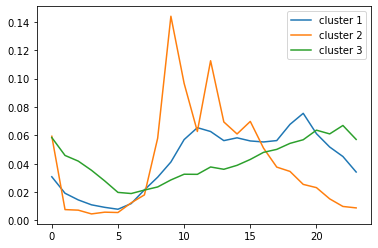

In [40]:
import matplotlib.pyplot as plt
for i in range(3):
    plt.plot(range(24),km.cluster_centers_[i], label='cluster {0}'.format(i+1))
plt.legend()
plt.show()

For cluster 1, the type of crime is likely to happen between 9 am to 21 pm, and reach 2 peaks at 11 am and 7 pm. It is unlikely to happen after 12 pm, especailly rare at 5 am.    
Cluster 2 is a type of crime which usually happen during 8-10 am, 11 am to 1pm, it has a drop at 12 am. And the crimes are unlikely to happen between 4 pm to 7 am in the next day.   
Cluster 3 is unlikely to happen during 4 am to 3 pm, especially rare at 5 am. And it is likely to happen around 9 pm.  

Theft is likely to be assigned in cluster 1. 
Deceptive practice is likely to be assigned in the cluster 2.
Homicide and weapon violation are likely to be assigneed in cluster 3.

In [46]:
from sklearn.cluster import KMeans
days=data3.iloc[:,2:9]
km = KMeans(n_clusters=3)
km.fit(days)

KMeans(n_clusters=3)

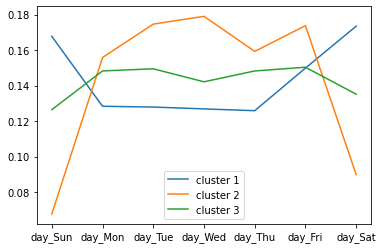

In [49]:
for i in range(3):
    plt.plot(data3.iloc[:,2:9].columns,km.cluster_centers_[i], label='cluster {0}'.format(i+1))
plt.legend()
plt.show()

The crime of cluster 1 is likely to happen during weekends. The cluster 2 has a slightly drop during weekends. The cirme of cluster 3 is likely to happen during weekdays, but rare at the weekends.

In [101]:
from sklearn.cluster import KMeans
community=data3.iloc[:,33:]
km = KMeans(n_clusters=3)
km.fit(community)

KMeans(n_clusters=3)

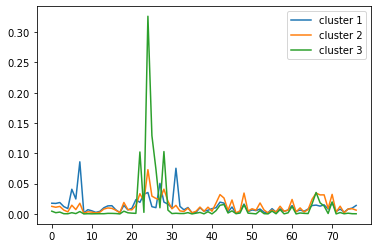

In [102]:
for i in range(3):
    plt.plot(range(77),km.cluster_centers_[i], label='cluster {0}'.format(i+1))
plt.legend()
plt.show()

In [108]:
list(km.cluster_centers_[0]).index(max(km.cluster_centers_[0]))

7

In [120]:
list(km.cluster_centers_[0]).index(0.07538662752000001)

31

In [109]:
list(km.cluster_centers_[1]).index(max(km.cluster_centers_[1]))

24

In [125]:
list(km.cluster_centers_[1]).index(0.04086511431395349)

28

In [110]:
list(km.cluster_centers_[2]).index(max(km.cluster_centers_[2]))

24

In [116]:
list(km.cluster_centers_[2]).index(0.10225476049999999)

22

In [118]:
list(km.cluster_centers_[2]).index(0.102925966875)

28

In [112]:
#Cluster 1
data4.iloc[7]

Community Area Number                                         8
COMMUNITY AREA NAME                             Near North Side
centroid_x                                           1175512.22
centroid_y                                          1906089.147
PERCENT OF HOUSING CROWDED                                  1.9
PERCENT HOUSEHOLDS BELOW POVERTY                           12.9
PERCENT AGED 16+ UNEMPLOYED                                 7.0
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA                2.5
PERCENT AGED UNDER 18 OR OVER 64                           22.6
PER CAPITA INCOME                                         88669
PERCENT OF HOUSING UNITS VACANT                        17.07716
NUM_CRIMES_2016                                            9847
Name: 7, dtype: object

In [121]:
data4.iloc[31]

Community Area Number                                    32
COMMUNITY AREA NAME                                    Loop
centroid_x                                      1176373.765
centroid_y                                      1899831.267
PERCENT OF HOUSING CROWDED                              1.5
PERCENT HOUSEHOLDS BELOW POVERTY                       14.7
PERCENT AGED 16+ UNEMPLOYED                             5.7
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA            3.1
PERCENT AGED UNDER 18 OR OVER 64                       13.5
PER CAPITA INCOME                                     65526
PERCENT OF HOUSING UNITS VACANT                    24.62908
NUM_CRIMES_2016                                        8471
Name: 31, dtype: object

The cluster 1 crimes are likely to happen in the areas which have high income and education rate, less teenagers and elders (more labor forces), less unemployed, low poverty rate. The communities tends to be rich and commercial areas.

In [113]:
#Cluster 2 & 3
data4.iloc[24]

Community Area Number                                    25
COMMUNITY AREA NAME                                  Austin
centroid_x                                      1140839.462
centroid_y                                      1903174.321
PERCENT OF HOUSING CROWDED                              6.3
PERCENT HOUSEHOLDS BELOW POVERTY                       28.6
PERCENT AGED 16+ UNEMPLOYED                            22.6
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA           24.4
PERCENT AGED UNDER 18 OR OVER 64                       37.9
PER CAPITA INCOME                                     15957
PERCENT OF HOUSING UNITS VACANT                   14.188517
NUM_CRIMES_2016                                       15719
Name: 24, dtype: object

The cluster 2 crimes are likely to happen in the poor areas with high poverty and unemploy rate, low education rate, less labor forces, less vacant houses. But the type of crimes tends to be normal among many communities.     
The cluster 3 crimes are more severely influenced by the poverty and overcrowded rate. Austin community occupies a huge proportion of the type of crimes. The crimes tends to happen in the underdeveloped areas with low income, less labor forces, education rate and employment rate.

In [122]:
#Cluster 3
data4.iloc[22]

Community Area Number                                      23
COMMUNITY AREA NAME                             Humboldt park
centroid_x                                        1151216.159
centroid_y                                        1906926.141
PERCENT OF HOUSING CROWDED                               14.8
PERCENT HOUSEHOLDS BELOW POVERTY                         33.9
PERCENT AGED 16+ UNEMPLOYED                              17.3
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA             35.4
PERCENT AGED UNDER 18 OR OVER 64                         38.0
PER CAPITA INCOME                                       13781
PERCENT OF HOUSING UNITS VACANT                     15.839488
NUM_CRIMES_2016                                          7522
Name: 22, dtype: object

In [123]:
data4.iloc[28]

Community Area Number                                       29
COMMUNITY AREA NAME                             North Lawndale
centroid_x                                         1152306.328
centroid_y                                         1892568.863
PERCENT OF HOUSING CROWDED                                 7.4
PERCENT HOUSEHOLDS BELOW POVERTY                          43.1
PERCENT AGED 16+ UNEMPLOYED                               21.2
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA              27.6
PERCENT AGED UNDER 18 OR OVER 64                          42.7
PER CAPITA INCOME                                        12034
PERCENT OF HOUSING UNITS VACANT                      21.888178
NUM_CRIMES_2016                                           8073
Name: 28, dtype: object

In [61]:
hours=data3.iloc[:,9:33]
km = KMeans(n_clusters=3)
km.fit(hours)

print('Cluster assignments:',km.labels_)

Cluster assignments: [2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1
 1 1 0 1 1 1 1 1 1 2 2 0 2 0 2 2 2 2 2 1 0 0 0 0 2 0 0 2 0 0 0 0 0 0 1 2 2
 1 1 2 0 0 1 1 0 1 1 2 2 0 1 0 1 2 2 0 1 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1
 2 2 2 1 2 2 2 2]


In [71]:
#4 Combination.
dic1 = {'P1P':0,'P1V': 1,'P2':2}
dic2 = {'P1P':1,'P1V': 0,'P2':2}
dic3 = {'P1P':2,'P1V': 1,'P2':0}
dic4 = {'P1P':0,'P1V': 2,'P2':1}

In [99]:
for i in [dic1,dic2,dic3,dic4]:
    comp = {
        "real":list(data3['Category']),
        "pred":km.labels_
    }
    comp=pd.DataFrame(comp)
    for row in comp.iterrows():
        comp['encode']=i[row[1][0]]
    comp['result'] = np.where(comp['pred']==comp['encode'],'1','0')
    print(list(comp['result']).count('1')/comp.shape[0])

0.5882352941176471
0.5882352941176471
0.18487394957983194
0.226890756302521


When P1P matches cluster 0, P1V matches cluster 1, P2 matches cluster 2; and P1P matches cluster 1, P1V matches cluster 0, P2 matches cluster 2, we get the best accuracy, which are all 0.588. 

The three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes are not precise enough.